<a href="https://colab.research.google.com/github/ritika-0111/Customer-Segmentation-using-LightGBM-Classifier/blob/main/LightGBM%20Customer%20Segregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data from CSV file

Read Train data

In [3]:
df_rawtrain = pd.read_csv("/content/drive/MyDrive/Customer Segmentation Data/Train_aBjfeNk.csv")
df_rawtrain.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


Read Test data

In [4]:
df_rawtest = pd.read_csv("/content/drive/MyDrive/Customer Segmentation Data/Test_LqhgPWU.csv")
df_rawtest.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6
7,459008,Female,Yes,47,Yes,Artist,1.0,Average,3.0,Cat_6
8,459013,Male,Yes,50,Yes,Artist,2.0,Average,4.0,Cat_6
9,459014,Male,No,19,No,Healthcare,0.0,Low,4.0,Cat_6


Read Sample Submission File

In [5]:
sample = pd.read_csv('/content/drive/MyDrive/Customer Segmentation Data/sample_submission_wyi0h0z.csv')

### Date Exploration

In [6]:
# Unique Professions
df_rawtrain['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [7]:
df_rawtrain[df_rawtrain.Ever_Married.isnull()].isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated            4
Profession           4
Work_Experience     23
Spending_Score       0
Family_Size         12
Var_1                1
Segmentation         0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


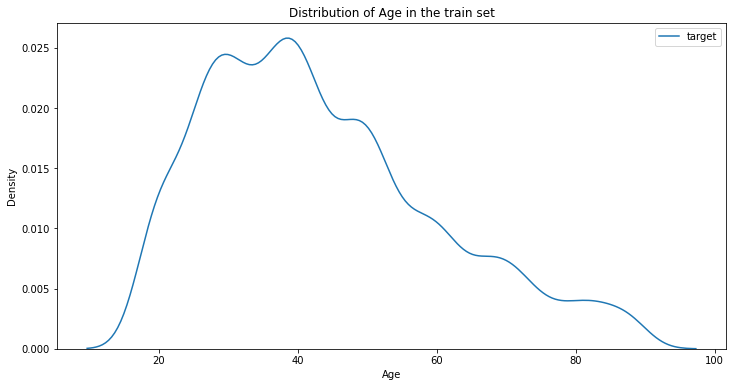

In [8]:
# Distribution of Age variable
plt.figure(figsize=(12,6))
plt.title("Distribution of Age in the train set")
sns.distplot(df_rawtrain['Age'],kde=True,hist=False, bins=120, label='target')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


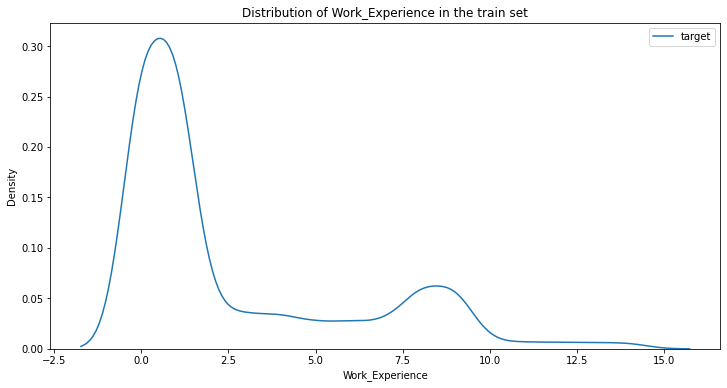

In [9]:
# Distribution of Work_Experience variable
plt.figure(figsize=(12,6))
plt.title("Distribution of Work_Experience in the train set")
sns.distplot(df_rawtrain['Work_Experience'],kde=True,hist=False, bins=120, label='target')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


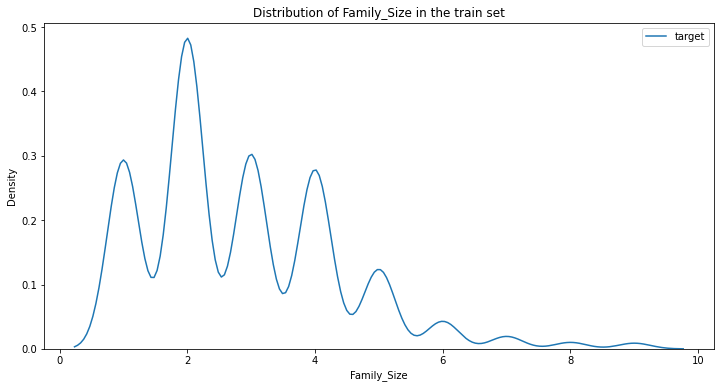

In [10]:
# Distribution of Family_Size variable
plt.figure(figsize=(12,6))
plt.title("Distribution of Family_Size in the train set")
sns.distplot(df_rawtrain['Family_Size'],kde=True,hist=False, bins=120, label='target')
plt.legend()
plt.show()

* Most of the Customer age lies between 20 to 60.
* 30% of the Customer have work experience of 0-2 Years.
* 50% of the customer have 2 memeber in their Family.


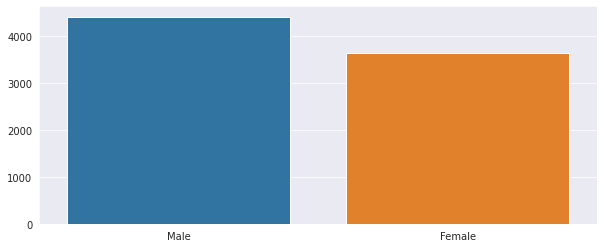

In [11]:
# Distribution of Gender Variable 
genders = df_rawtrain.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

* We have more male customers than the female customers.

In [12]:
# check target distribution in train 
df_rawtrain['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

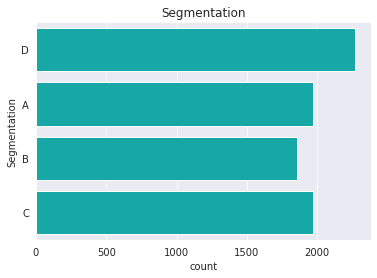

In [13]:
# Segmentation into A, B, C and D
plt.title('Segmentation')
sns.countplot(y='Segmentation', data=df_rawtrain, color="c")
plt.show()

* Segment D is the most common while Segment B is the least common 

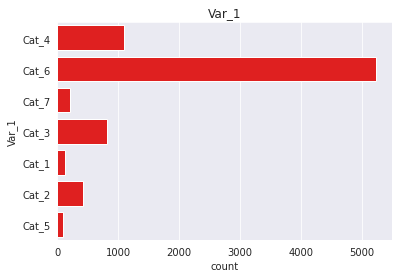

In [14]:
# Segmentation into A, B, C and D
plt.title('Var_1')
sns.countplot(y='Var_1', data=df_rawtrain, color="r")
plt.show()

* Cat_6 is the most common while Cat_5 is the least common.

In [15]:
# Unique values in the Gender, Ever_Married, Graduated, Profession, Spending_Score, Var_1
for i in ['Gender' , 'Ever_Married' , 'Graduated','Profession','Spending_Score','Var_1'  ]:
    print(f"{i} unique values {df_rawtrain[i].unique()}")

Gender unique values ['Male' 'Female']
Ever_Married unique values ['No' 'Yes' nan]
Graduated unique values ['No' 'Yes' nan]
Profession unique values ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
Spending_Score unique values ['Low' 'Average' 'High']
Var_1 unique values ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']


In [16]:
# all blank values replace with mode in Train Data
for column in df_rawtrain.columns:
  df_rawtrain[column].fillna(df_rawtrain[column].mode()[0], inplace=True)

# all blank values replace with mode in Test Data
for column in df_rawtest.columns:
  df_rawtest[column].fillna(df_rawtest[column].mode()[0], inplace=True)

#### Label Encoding

In [17]:
# Encode categorical value in Train Data
from sklearn.preprocessing import LabelEncoder

for i in ['Gender' , 'Ever_Married' , 'Graduated','Profession','Spending_Score','Var_1'  ]:
    enc = LabelEncoder()
    df_rawtrain[i] = enc.fit_transform(df_rawtrain[i].astype('str'))


In [18]:
# Encode categorical value in Test Data
from sklearn.preprocessing import LabelEncoder

for i in ['Gender' , 'Ever_Married' , 'Graduated','Profession','Spending_Score','Var_1'  ]:
    enc = LabelEncoder()
    df_rawtest[i] = enc.fit_transform(df_rawtest[i].astype('str'))

In [19]:
df_rawtrain.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,D
1,462643,0,1,38,1,2,1.0,0,3.0,3,A
2,466315,0,1,67,1,2,1.0,2,1.0,5,B
3,461735,1,1,67,1,7,0.0,1,2.0,5,B
4,462669,0,1,40,1,3,1.0,1,6.0,5,A


In [20]:
# Map values 0,1,2,3 to Segmentation Values A,B,C,D
df_rawtrain['Segmentation'] = df_rawtrain['Segmentation'].map({'A':0,'B':1,'C':2,'D':3})

### Split Data into Train and Test Data

In [21]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split

# feature vector and target variable
X = df_rawtrain.drop(['Segmentation','ID'],axis=1)
y = df_rawtrain['Segmentation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Model Prediction

In [22]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Train and Test set Accuracy

In [23]:
# predict the results
y_pred=clf.predict(X_test)

In [24]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.5134


In [25]:
y_pred_train = clf.predict(X_train)

In [26]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6774


In [27]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.6774
Test set score: 0.5134


### Confusion Matrix

In [28]:
# Print the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[238 128  89 126]
 [141 187 184  62]
 [ 69 124 314  80]
 [123  35  17 504]]

True Positives(TP) =  238

True Negatives(TN) =  187

False Positives(FP) =  128

False Negatives(FN) =  141


### Classification Metrices

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.41      0.41       581
           1       0.39      0.33      0.36       574
           2       0.52      0.53      0.53       587
           3       0.65      0.74      0.69       679

    accuracy                           0.51      2421
   macro avg       0.50      0.50      0.50      2421
weighted avg       0.50      0.51      0.51      2421



### Prepare Submission File

In [30]:
df_test = df_rawtest.drop(['ID'],axis=1)
sample.Segmentation = clf.predict(df_test)

In [31]:
sample.head(5)

,ID,Segmentation
0,458989,0
1,458994,1
2,458996,1
3,459000,2
4,459001,3


In [32]:
# Map values A,B,C,D to Segmentation Values 0,1,2,3
sample.Segmentation = sample.Segmentation.map({0:'A', 1:'B', 2:'C', 3:'D'})

In [33]:
sample.head(5)

,ID,Segmentation
0,458989,A
1,458994,B
2,458996,B
3,459000,C
4,459001,D


### Save Submission File to CSV file

In [34]:
sample[['ID','Segmentation']].to_csv('submission.csv',index = False)